# Adding exponential mass loss/growth

You can always modify the mass of particles between calls to `sim.integrate`.  However, if you want to apply the mass/loss growth every timestep *within* calls to `sim.integrate`, you should use this.

We begin by setting up a system with 3 planets.

In [89]:
import rebound
import reboundx
import numpy as np
sim = rebound.Simulation()
sim.G = 4*np.pi**2 # use units of AU, yrs and solar masses

M0 = 1. # initial mass of star
sim.add(m=M0)
sim.add(m=M0, a=1.)
sim.add(a=2)
#sim.add(a=3.)
sim.move_to_com()

In [90]:
sim.particles[1].P

0.7071067811865476

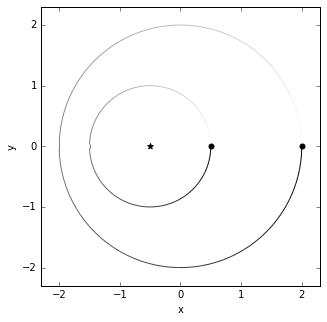

In [91]:
%matplotlib inline
fig = rebound.OrbitPlot(sim, trails=True)

We now add mass loss through REBOUNDx:

In [92]:
rebx = reboundx.Extras(sim)
params = rebx.add_modify_mass()
print("Params = {0}".format(params))
#params = rebx.add_modify_orbits_forces()

Params = None


Note that unlike most other REBOUNDx effects, the effect adder doesn't return anything for `modify_mass` (because the effect is so simple!)

Now we set the e-folding mass loss/growth rate.  

**Positive timescales give growth, negative timescales loss.**

Here we have the star lose mass with an e-folding timescale of $10^4$ yrs.

In [93]:
sim.particles[0].tau_mass = -1.e0
#sim.particles[2].tau_a = -1.e4

Now we integrate for one e-folding timescale, and plot the resulting system:

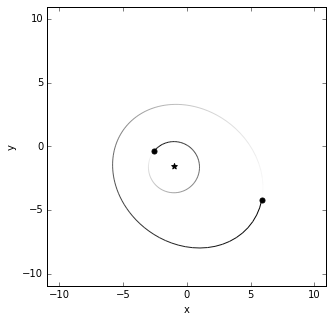

In [94]:
Nout = 1000
mass = np.zeros(Nout)
times = np.linspace(0., 1.e1, Nout)
a = np.zeros(Nout)

for i, time in enumerate(times):
    sim.integrate(time)
    mass[i] = sim.particles[0].m
    a[i] = sim.particles[1].a
    
fig = rebound.OrbitPlot(sim, trails=True)

We see that after the mass of the star has decayed by a factor of `e`, the scale of the system has expanded by the corresponding factor, as one would expect.  If we plot the mass of the star vs time, compared to an exponential decay, the two overlap (phew!)

In [95]:
sim.status()

---------------------------------
REBOUND version:     	2.16.1
REBOUND built on:    	May 17 2016 14:18:46
Number of particles: 	3
Selected integrator: 	ias15
Simulation time:     	10.000000
Current timestep:    	0.003217
---------------------------------
<rebound.Particle object, id=0 m=4.4131904458970475e-05 x=-1.026372010000323 y=-1.521935441284948 z=0.0 vx=2.663990260947848 vy=3.555610312134013 vz=0.0>
<rebound.Particle object, id=0 m=1.0 x=-2.562939089443925 y=-0.37068449543142207 z=0.0 vx=-0.25609055042343465 vy=-0.03942966637254554 vz=0.0>
<rebound.Particle object, id=0 m=0.0 x=5.870304733254482 y=-4.249527962819307 z=0.0 vx=0.04287070069633446 vy=1.399215680159585 vz=0.0>
---------------------------------


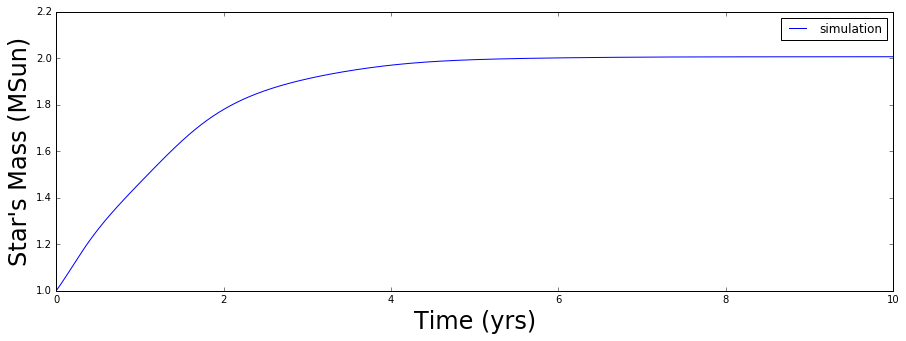

In [96]:
pred = M0*np.e**(times/sim.particles[0].tau_mass)
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(111)
ax.plot(times,a, label='simulation')
#ax.plot(times,pred, label='predicted')
ax.set_xlabel("Time (yrs)", fontsize=24)
ax.set_ylabel("Star's Mass (MSun)", fontsize=24)
plt.legend()